In [1]:
#Load White Wines data
import pandas as pd
import numpy as np

In [2]:
input_file="whitewines.csv"
wine=pd.read_csv(input_file)
wine.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.7,0.62,0.24,1.10,0.039,6.0,62.0,0.99340,3.41,0.32,10.400000,5
1,5.7,0.22,0.20,16.00,0.044,41.0,113.0,0.99862,3.22,0.46,8.900000,6
2,5.9,0.19,0.26,7.40,0.034,33.0,123.0,0.99500,3.49,0.42,10.100000,6
3,5.3,0.47,0.10,1.30,0.036,11.0,74.0,0.99082,3.48,0.54,11.200000,4
4,6.4,0.29,0.21,9.65,0.041,36.0,119.0,0.99334,2.99,0.34,10.933333,6


In [3]:
#Plot the target variable
import matplotlib.pyplot as plt


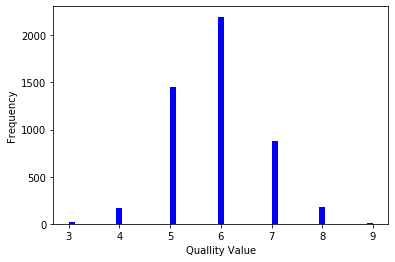

In [4]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=wine['quality'], bins='auto', color='b', )
plt.xlabel('Quallity Value')
plt.ylabel('Frequency')
plt.show()


In [5]:
#Design the model like you did earlier(Credit data)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [6]:
X = wine.drop(['quality'], axis=1) 
y = wine['quality'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1234) 


In [7]:
model = tree.DecisionTreeClassifier()


In [8]:
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)


In [9]:
#Create a dot file
from sklearn.tree import export_graphviz  

export_graphviz(model, out_file ='tree.dot', feature_names =X.columns)


In [10]:
#Start with predicting the output using the same methods as before. 
#Call the output y_predict.  The fact that the model’s range is much
#smaller than the data’s actual range suggests that the model is not 
#adequately capturing the extremes of the range of quality, i.e. the 
#very good or very bad wines. We can also check the correlation
 
A 54% correlation is ok, but not great.
np.corrcoef(y_test,y_predict)


array([[1.        , 0.53845036],
       [0.53845036, 1.        ]])

In [11]:
from sklearn.metrics import mean_squared_error 
RMSE = mean_squared_error(y_predict, y_test)**0.5 
RMSE
#Q3- What is your interpretation about this amount of RMSE? 
#is the standard deviation of the residuals (prediction errors). 
#Residuals are the absolute measure of how far from the regression line data points are; 
#RMSE is a measure of how spread out these residuals are. 
#In other words, it tells you how concentrated the data is around the line of best fit.
#A value of 0 indicates a perfect fit to the data; this value is closer to 1 and indicates
#not a very good fit to the data.


0.8415243700013224

In [16]:
#Regression graph
from sklearn.tree import export_graphviz
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,  
feature_names=X.columns,filled=True, rounded=True, special_characters=True)    
graph = graphviz.Source(dot_data)   
graph  
 